<a href="https://colab.research.google.com/github/cathymonkey/AlienPass/blob/main/sci_python_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cathy Fan and Bianca Beingolea**

Fall 2024

CS 343: Neural Networks

# Project 0 | Scientific Python

This is a short project aimed at refreshing your memory of numpy, pandas, vectorized programming, and plotting. The focus is practicing common operations that will come up all semester with simple examples.

**Reminders and notes**:
- Submit rubric on Google Classroom (one person per team).
- Submit code as a .zip file named `username.zip`.
- Fill out the team work Google Form linked to on Google Classroom (everyone does this).
- There should be ZERO loops of any kind below!
- If you are doing extensions, remember that they are being graded based on the 5 minute video that record and submit with your project.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
# Make the font size larger
plt.show()
plt.rcParams.update({'font.size': 18})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

## Task 1: Common shape operations

1. Create an ndarray of values drawn from a Gaussian mean 0 stdev 0.5 with shape `(3, 2, 3, 1, 5)`. Do this the way we discussed in class, with a seed of 2.

In [ ]:
np.random.seed(0)  # Keep these random seeds for test code purposes

# YOUR CODE HERE
rng = np.random.default_rng(2)
gauss = rng.normal(loc=0, scale=0.5, size=(3, 2, 3, 1, 5))

In [ ]:
print(f'Your shape is {gauss.shape} and should be (3, 2, 3, 1, 5)')
print(f'Your first 3 numbers are\n{gauss[0,0,0,0,:3]}\nand should be\n[ 0.095 -0.261 -0.207]]')

Your shape is (3, 2, 3, 1, 5) and should be (3, 2, 3, 1, 5)
Your first 3 numbers are
[ 0.095 -0.261 -0.207]
and should be
[ 0.095 -0.261 -0.207]]


2. Reshape your array so that it has a leading singleton dimension

In [ ]:
# YOUR CODE HERE
gauss = gauss[None, :]

In [ ]:
print(f'Your shape is {gauss.shape} and should be (1, 3, 2, 3, 1, 5)')

Your shape is (1, 3, 2, 3, 1, 5) and should be (1, 3, 2, 3, 1, 5)


3. Remove singleton dimensions

In [ ]:
# YOUR CODE HERE
gauss = np.squeeze(gauss)

In [ ]:
print(f'Your shape is {gauss.shape} and should be (3, 2, 3, 5)')

Your shape is (3, 2, 3, 5) and should be (3, 2, 3, 5)


4. Reshape your ndarray to merge non-leading dimensions. No hard coding!

In [ ]:
# YOUR CODE HERE
gauss = np.reshape(gauss, [gauss.shape[0], np.prod(gauss.shape[1:])])

In [ ]:
print(f'Your shape is {gauss.shape} and should be (3, 30)')
print(f'Your 2nd row of 1st 3 numbers is\n{gauss[1,:3]} and should be\n[0.421 0.064 0.539]')

Your shape is (3, 30) and should be (3, 30)
Your 2nd row of 1st 3 numbers is
[0.421 0.064 0.539] and should be
[0.421 0.064 0.539]


5. Print the number of total elements in `gauss`

In [ ]:
# YOUR CODE HERE
print(gauss.size)

90


In [ ]:
print('You should get 90.')

You should get 90.


6. Figure out how to permute (swap) the dimensions of the ndarray `x` in the cell below from shape=(5, 2, 3) to (3, 5, 2). You should do this in one line of code and is relatively simple. *The long text below is just to give you an intuition why this problem will come up in class this semester when working with image data.*

**Intuition:** There is an image consisting of a 5x2 grid of RGB values (i.e. 5x2x3): `[(R1,G1,B1), (R2,G2,B2)], [(R1,G1,B1), (R2,G2,B2)], ...`. We want to shuffle this up so that all the R values are grouped together (rather than being next to the G and B values). We also want to arrange each of the color values in a grid that matches the height and width of the original image (5x2). So the interpretation now is that we have 3 grayscale images: one made up of only the R values (in a 5x2 grid), one made up only of G values, and one made up only of B values.

**Visually**:

Original `x`:

    array([[[ 1.764,  0.4  ,  0.979],
            [ 2.241,  1.868, -0.977]],

           [[ 0.95 , -0.151, -0.103],
            [ 0.411,  0.144,  1.454]],

           [[ 0.761,  0.122,  0.444],
            [ 0.334,  1.494, -0.205]],

           [[ 0.313, -0.854, -2.553],
            [ 0.654,  0.864, -0.742]],

           [[ 2.27 , -1.454,  0.046],
            [-0.187,  1.533,  1.469]]])
    

Answer `x_p`:

    array([[[ 1.764,  2.241],
            [ 0.95 ,  0.411],
            [ 0.761,  0.334],
            [ 0.313,  0.654],
            [ 2.27 , -0.187]],

           [[ 0.4  ,  1.868],
            [-0.151,  0.144],
            [ 0.122,  1.494],
            [-0.854,  0.864],
            [-1.454,  1.533]],

           [[ 0.979, -0.977],
            [-0.103,  1.454],
            [ 0.444, -0.205],
            [-2.553, -0.742],
            [ 0.046,  1.469]]])

In [ ]:
# don't change this (but do execute it). This is for test code
x_p_sol = np.array([[[ 1.764,  2.241],
            [ 0.95 ,  0.411],
            [ 0.761,  0.334],
            [ 0.313,  0.654],
            [ 2.27 , -0.187]],

           [[ 0.4  ,  1.868],
            [-0.151,  0.144],
            [ 0.122,  1.494],
            [-0.854,  0.864],
            [-1.454,  1.533]],

           [[ 0.979, -0.977],
            [-0.103,  1.454],
            [ 0.444, -0.205],
            [-2.553, -0.742],
            [ 0.046,  1.469]]])

In [ ]:
np.random.seed(0)  # keep me
x = np.random.randn(5, 2, 3)

# YOUR CODE HERE
x_p = np.moveaxis(x, -1, 0)


In [ ]:
print(f'The shape of x_p is {x_p.shape} and should be (3, 5, 2)')
print('Your array below should match x_p above:\n', x_p)
print(f'...and they match? {np.allclose(x_p_sol, x_p, rtol=1e-1)}')

The shape of x_p is (3, 5, 2) and should be (3, 5, 2)
Your array below should match x_p above:
 [[[ 1.764  2.241]
  [ 0.95   0.411]
  [ 0.761  0.334]
  [ 0.313  0.654]
  [ 2.27  -0.187]]

 [[ 0.4    1.868]
  [-0.151  0.144]
  [ 0.122  1.494]
  [-0.854  0.864]
  [-1.454  1.533]]

 [[ 0.979 -0.977]
  [-0.103  1.454]
  [ 0.444 -0.205]
  [-2.553 -0.742]
  [ 0.046  1.469]]]
...and they match? True


7. The following ndarray has a `uint8` datatype (`dtype` in numpy parlance). Cast the ndarray into a `float64` dtype, the normalize the values so that the (0, 255) uint8 values (the smallest and largest possible values) become (0.0, 1.0) float64 values.

**Note:** Only 255 should map to 1.0. If 255 were not max value presently in the input vector, you shouldn't have a 1.0 in the float64 array.

*Data from images often come in as `uint8` (0 to 255 ints) but neural networks tend to work with continuous real values, and best with normalized inputs.*

In [ ]:
u = np.uint8([7, 4, 20, 22, 3])

# YOUR CODE HERE
u = u.astype(np.float64)
u = (u-0)/255


In [ ]:
print(f'The min is {u.min():.4f}, the max is {u.max():.4f}.\nThey should be 0.0118 and 0.0863')
print(f'The type is {u.dtype} and should be float64.')

The min is 0.0118, the max is 0.0863.
They should be 0.0118 and 0.0863
The type is float64 and should be float64.


## Task 2: Matrix multiplication and operations

1. Define ndarray `a` of all 5s (`shape=(8,31)`). Define ndarray `b` of ints 0 thru 7 (`shape=(8,)`), no hard coding!

In [ ]:
# YOUR CODE HERE
a = np.ones((8, 31)) * 5
b = np.arange(8)

In [ ]:
print(f'Your a shape is {a.shape}, and should be (8, 31).')
print(f'All your a values == 7? {np.all(a == 5)}')
print(f'Your b shape is {b.shape}, and should be (8,).')
print(f'Min of b is 0? {b.min() == 0}. Max of b is 7? {b.max() == 7}')

Your a shape is (8, 31), and should be (8, 31).
All your a values == 7? True
Your b shape is (8,), and should be (8,).
Min of b is 0? True. Max of b is 7? True


2. Matrix multiply the ndarrays in the order "a times b" a way to get `c` with dimensions (31,). **This should be a one-liner!**

In [ ]:
# YOUR CODE HERE
c = b.T @ a

In [ ]:
print(f'Your c shape is {c.shape}, and should be (31,).')
print(f'All your c values == 140? {np.all(c == 140.)}')

Your c shape is (31,), and should be (31,).
All your c values == 140? True


3. Sum across your `a` array along the last axis, preserving the number of dimensions

In [ ]:
# YOUR CODE HERE
a_sum = np.sum(a, axis=1, keepdims=True)

In [ ]:
print(f'Your a_sum shape is {a_sum.shape}, and should be (8, 1).')
print(f'All your a_sum values == 155? {np.all(a_sum == 155.)}')

Your a_sum shape is (8, 1), and should be (8, 1).
All your a_sum values == 155? True


4. Standardize the following following array in 1 line of code. Recall the equation is $$x_s = \frac{x-\mu}{\sigma}$$

In [ ]:
np.random.seed(0)  # keep me!
x = np.random.normal(loc=10, scale=0.5, size=(5,))

# YOUR CODE HERE
x_s = (x - np.mean(x)) / np.std(x)

In [ ]:
print(f'Your standardized array is\n{x_s}\nand should be\n[ 0.471 -1.575 -0.707  1.186  0.626]')

Your standardized array is
[ 0.471 -1.575 -0.707  1.186  0.626]
and should be
[ 0.471 -1.575 -0.707  1.186  0.626]


5. Perform min-max normalization on the following array so that min and max of each variable (column) is 0 and 1, respectively. Write code that verifies that `x` has been min-max normalized correctly.

In [ ]:
np.random.seed(0)  # keep me!
x = np.random.uniform(low=-5, high=10, size=(6,3))

# YOUR CODE HERE
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))

In [ ]:
print(f'The column mins of the normalized array is\n{np.min(x_norm, axis=0)}\nand should be\n[0. 0. 0.]')
print(f'The column maxs of the normalized array is\n{np.max(x_norm, axis=0)}\nand should be\n[1. 1. 1.]')

The column mins of the normalized array is
[0. 0. 0.]
and should be
[0. 0. 0.]
The column maxs of the normalized array is
[1. 1. 1.]
and should be
[1. 1. 1.]


6. Center the following array that has 4 columns (variables). Write code that verifies that `x` has been centered correctly. *Having `-0.` entries is ok.*

In [ ]:
np.random.seed(0)  # keep me!
x = np.random.uniform(low=-5, high=10, size=(5,4))

# YOUR CODE HERE
x_c = x - np.mean(x, axis=0)

In [ ]:
print(f'The column means are\n{x_c.mean(0)}\nand should be\n[ 0. -0.  0. -0.]')

The column means are
[ 0. -0.  0. -0.]
and should be
[ 0. -0.  0. -0.]


## Task 3: Indexing

1. Replace all values < 0 with -1, all values >= 0 with +1. Can be done with a one-liner.

In [ ]:
np.random.seed(0)  # keep me!
rand_vals = np.random.uniform(low=-5, high=4, size=(25, 25))

# YOUR CODE HERE
rand_vals = np.where(rand_vals < 0, -1, 1)

In [ ]:
print(f'Number of -1s is {np.count_nonzero(rand_vals == -1)} and should be 347.')
print(f'Number of +1s is {np.count_nonzero(rand_vals == 1)} and should be 278.')

Number of -1s is 347 and should be 347.
Number of +1s is 278 and should be 278.


2. Use logical indexing to select values greater than 10, assign them to a new array `x_10`. The correct solution does not involve tuples.

In [ ]:
np.random.seed(0)  # keep me!
x = np.random.randint(low=0, high=21, size=(10))

# YOUR CODE HERE
x_10 = x[x > 10]

In [ ]:
print(f'Values > 10 are: {x_10} and should be [12 15 19 18]')
print('(If your order of values is different, that is ok.)')

Values > 10 are: [12 15 19 18] and should be [12 15 19 18]
(If your order of values is different, that is ok.)


3. Figure out how to convert (row, col) **subscript (tuple) indices** to a **linear (flat) index**. *Hint*: There is a Numpy function that does the heavy lifting. It should work on the following test case:

*Example:* If the (row, col) = (5, 5) in an ndarray with shape=(100, 30), the linear index should be 155.

In [ ]:
# YOUR CODE HERE
linInd = np.ravel_multi_index(multi_index=([5,5]), dims = (100,30), mode = 'raise', order = 'C' )

In [ ]:
print(f'Your linear index is {linInd} and should be 155')

Your linear index is 155 and should be 155


4. Figure out how to go in the other direction, go from linear index to subscript index. It should work on the following test case:

The linear index 155 maps to (row, col) = (5, 5) in an ndarray with `shape=(100, 30)`.

In [ ]:
# YOUR CODE HERE
subs = np.unravel_index(indices = 155, shape=(100,30), order = 'C')

In [ ]:
print(f'Your subscripts are {subs} and should be (5, 5)')

Your subscripts are (5, 5) and should be (5, 5)


5. Use column `arange` indexing to make:
- the 1st 3 rows of the first column 1s
- rows 4-6 of the third column 1s.
- rows 7-8 of the second column 1s.

There's no need to do this in one line of code (i.e. multiple lines of code are fine)! The cell below should print:

    [[1. 0. 0.]
     [1. 0. 0.]
     [1. 0. 0.]
     [0. 0. 1.]
     [0. 0. 1.]
     [0. 0. 1.]
     [0. 1. 0.]
     [0. 1. 0.]]

In [ ]:
# YOUR CODE HERE
x = np.zeros([8,3])
y = np.array([0,0,0,2,2,2,1,1])

x[np.arange(x.shape[0])[:3],y[:3]] = 1
x[np.arange(x.shape[0])[3:6], y[3:6]] = 1
x[np.arange(x.shape[0])[-2:], y[-2:]] = 1

In [ ]:
print(x)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


6. In one line of code (using indexing), assign 5s between the 9th and 15th (inclusive) rows and columns (a square chunk of the 2D array). **Careful with off by one errors.**

In [ ]:
x = np.zeros((25, 25))

# YOUR CODE HERE
x[8:15, 8:15] = 5

In [ ]:
print(f'No rouge elements in your array? {np.all(np.unique(x) == np.array([0, 5]))}')
print(f'Total number of 5s correct? {np.sum(x) == 245}')

No rouge elements in your array? True
Total number of 5s correct? True


7. Reverse elements in the following ndarray in axes 1 and 2 only (0 being the "1st axis").

In [ ]:
np.random.seed(0)
x = np.random.randn(6, 8, 12, 14, 16)

# YOUR CODE HERE
x = x[:, ::-1, ::-1, :, :]

In [ ]:
print('Your 1st 2 elements of the result in each dim (flattened) are\n', x[:2, :2, :2, :2, :2].flatten())
print('They should be')
x_sol = np.array([ 0.384, -3.084,  0.302, -0.511,  0.691,  0.441,  0.943,  2.123,
        0.339,  0.328,  2.297,  0.186,  0.162,  0.953,  0.281,  0.97 ,
        0.116,  1.595, -1.702, -0.934, -0.617,  0.717, -0.856, -0.565,
       -0.682,  0.534, -1.018, -0.074,  0.758, -1.447,  1.651,  0.81 ])
print(x_sol)

Your 1st 2 elements of the result in each dim (flattened) are
 [ 0.384 -3.084  0.302 -0.511  0.691  0.441  0.943  2.123  0.339  0.328
  2.297  0.186  0.162  0.953  0.281  0.97   0.116  1.595 -1.702 -0.934
 -0.617  0.717 -0.856 -0.565 -0.682  0.534 -1.018 -0.074  0.758 -1.447
  1.651  0.81 ]
They should be
[ 0.384 -3.084  0.302 -0.511  0.691  0.441  0.943  2.123  0.339  0.328
  2.297  0.186  0.162  0.953  0.281  0.97   0.116  1.595 -1.702 -0.934
 -0.617  0.717 -0.856 -0.565 -0.682  0.534 -1.018 -0.074  0.758 -1.447
  1.651  0.81 ]


8. Create an array called `mask` that has the same shape as `arr` and fill it with `True` everywhere a number larger than 1 appears in the corresponding position of `arr`, `False` otherwise. This type of array is called a **mask** of `arr`.

In [ ]:
np.random.seed(0)
arr = np.random.uniform(low=0, high=2, size=(5, 5))

# YOUR CODE HERE
mask = np.where(arr > 1, True, False)

In [ ]:
print(mask)
print('Your mask array should look like:')
print('''[[ True  True  True  True False]
 [ True False  True  True False]
 [ True  True  True  True False]
 [False False  True  True  True]
 [ True  True False  True False]]''')

[[ True  True  True  True False]
 [ True False  True  True False]
 [ True  True  True  True False]
 [False False  True  True  True]
 [ True  True False  True False]]
Your mask array should look like:
[[ True  True  True  True False]
 [ True False  True  True False]
 [ True  True  True  True False]
 [False False  True  True  True]
 [ True  True False  True False]]


## Task 4: Plotting and loading data

1. Use matplotlib to create a nicely formatted plot of $1/\left (1+e^{-x} \right )$ and $1/\left (1+e^{x} \right )$ evaluated from -6 to 6. Choose an x sampling rate so that the curves look smooth (**no jagged edges!!**). Make sure to


- make $1/\left (1+e^{-x} \right )$ red and dashed
- make $1/\left (1+e^{x} \right )$ blue and dotted
- set the y range in view to -0.1 to 1.1.
- include a *useful* legend
- include x and y axis labels
- include a *useful* title

Executing the cell below should generate the plot include WITHOUT any weird outputs about plot object

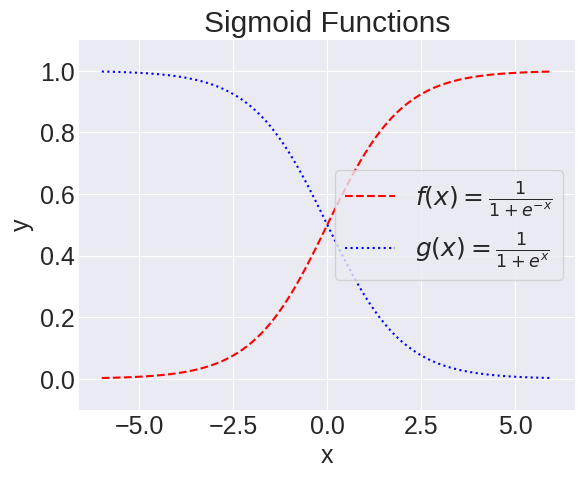

In [ ]:
# YOUR CODE HERE
x = np.linspace(-6, 6, 100)

l1 = 1 / (1 + np.exp(-x))
l2 = 1 / (1 + np.exp(x))

plt.plot(x, l1, color='red', linestyle='--', label=r'$f(x) = \frac{1}{1 + e^{-x}}$')
plt.plot(x, l2, color='blue', linestyle=':', label=r'$g(x) = \frac{1}{1 + e^{x}}$')

plt.ylim(-0.1, 1.1)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Functions')
plt.legend(frameon=True)

plt.show()

2. Use `pandas` to download and open the Iris dataset over the internet (should run if data CSV file NOT present in your working directory). Create a DataFrame object `df` with the 1st two features and the species names (currently strings) coded categorically as ints.

The url for the data is: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Note that the above file does not include any headers and is in CSV format.

In [ ]:
# YOUR CODE HERE
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=['F1', 'F2', 'F3', 'F4', 'species'])

# Select first two features and species column
df = iris[['F1', 'F2', 'species']].copy()

# Convert species to categorical data type
df['species'] = pd.Categorical(df['species'])

# Replace strings with their int categorical codes
df['species'] = df['species'].cat.codes

In [ ]:
print(f'The first row is\n{df.iloc[0,:].to_numpy()} and should be\n[5.1 3.5 0. ]')
print(f'The last row is\n{df.iloc[-1,:].to_numpy()} and should be\n[5.9 3.  2. ]')

The first row is
[5.1 3.5 0. ] and should be
[5.1 3.5 0. ]
The last row is
[5.9 3.  2. ] and should be
[5.9 3.  2. ]


3. Convert the DataFrame to a ndarray and create a scatter plot of `df`. Color the points by their class label. The default white/gray/black color scheme is fine.


- Superimpose the line y = x - 2.25.
- Make the line colored red.
- Restrict the x bounds to [4, 8]
- Restrict the y bounds to [2, 5]

Executing the cell below should generate the plot include WITHOUT any weird outputs about plot object

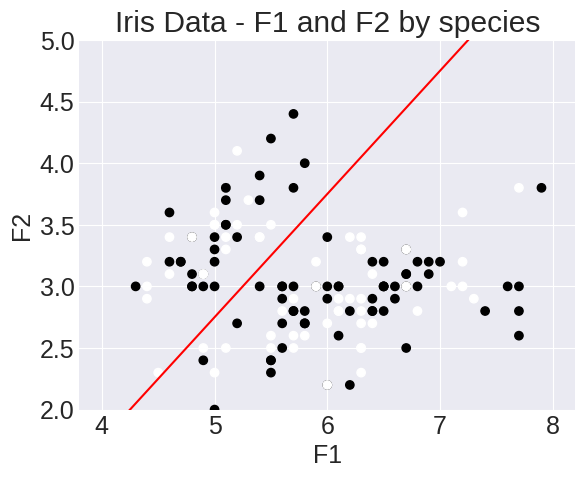

In [ ]:
# YOUR CODE HERE
df.to_numpy()

rng = np.random.default_rng(0)
colors = rng.integers(0, 2, size=len(df))
plt.scatter(df['F1'], df['F2'], c=colors)

x = np.linspace(4, 8, 100)
y = x - 2.25

plt.plot(x, y, color='red', linestyle='-', label='y = x - 2.25')

plt.ylim(2, 5)

plt.title('Iris Data - F1 and F2 by species')
plt.xlabel('F1')
plt.ylabel('F2')

plt.show()


4. Create a 2x2 grid of scatter plots with the following contents:


- (0,0): 2D Uniform random data
- (0,1): 2D isotropic (symmetric blob) Gaussian random data
- (1,0): 2D anisotropic (blob stretched out in a direction) Gaussian random data. Disregard RuntimeWarning messages if you are able to get the plot to look right.
- (1,1): The iris scatter plot
- Give your panels the titles a, b, c, d.

Make the figure large enough to be legible

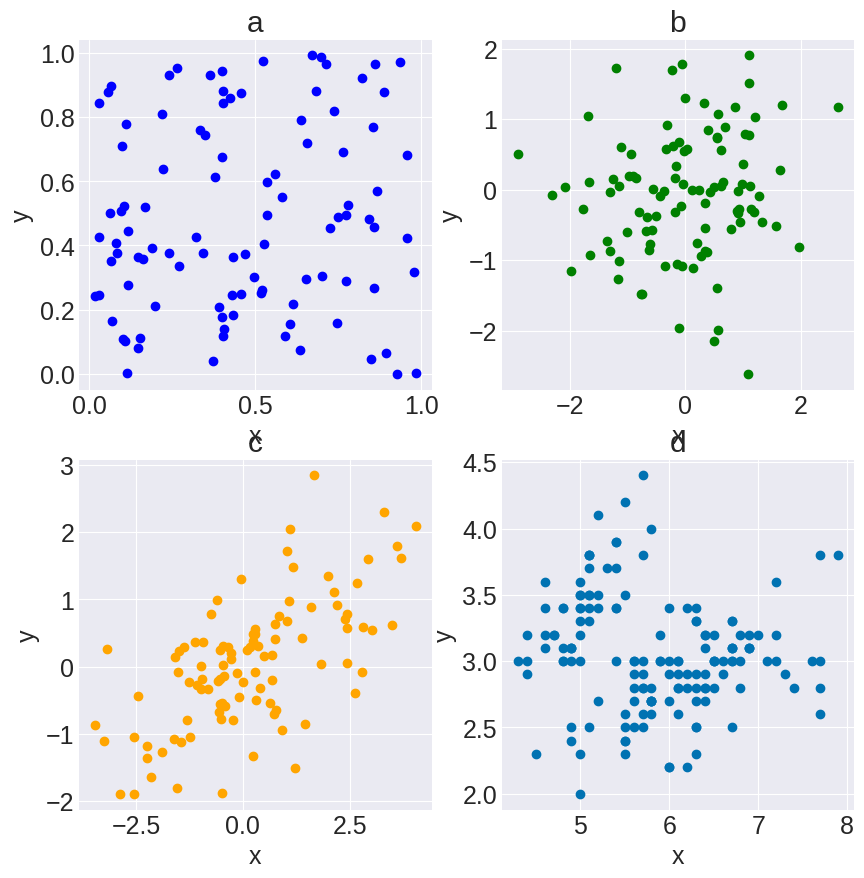

In [ ]:
# YOUR CODE HERE
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Axis (0,0): 2D Uniform random data
x_uniform = np.random.uniform(0, 1, 100)
y_uniform = np.random.uniform(0, 1, 100)
axs[0, 0].scatter(x_uniform, y_uniform, color='blue')
axs[0, 0].set_title('a')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')

# Axis (0,1): 2D isotropic Gaussian random data (symmetric blob)
x_gaussian_iso = np.random.normal(0, 1, 100)
y_gaussian_iso = np.random.normal(0, 1, 100)
axs[0, 1].scatter(x_gaussian_iso, y_gaussian_iso, color='green')
axs[0, 1].set_title('b')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')

# Axis (1,0): 2D anisotropic Gaussian random data (stretched blob)
mean = [0, 0]
cov = [[3, 1], [1, 1]]  # Anisotropic covariance matrix (stretched out)
x_aniso, y_aniso = np.random.multivariate_normal(mean, cov, 100).T
axs[1, 0].scatter(x_aniso, y_aniso, color='orange')
axs[1, 0].set_title('c')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')

# Axis (1,1): Iris dataset scatter plot
scatter = axs[1, 1].scatter(df['F1'], df['F2'])
axs[1, 1].set_title('d')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')

# Show the plot
plt.show()

5. Create a 2D heatmap plot of the function $$z(r, c) = \sqrt{sin(r)^2 + cos(0.1c)^2}$$ where $r$ stands for the row of a matrix and $c$ stands for the column of a matrix. Both the rows and columns should range from 0 to 99. That is, you are "plotting a 2D grid", where the entry in position (r, c) is given by $z(r, c)$.<br/><br/>Do this in matrix (image) coordinates rather than Cartesian coordinates — the plotted value corresponding to (0, 0) occupies the TOP-LEFT position of the plot.

For example, the row inputs (r) on a 3x3 grid would look like:

```
[[0 0 0]
 [1 1 1]
 [2 2 2]]
```

the column inputs (c) would look like:

```
[[0 1 2]
 [0 1 2]
 [0 1 2]]
```

#### Hints

- Check out the numpy function `meshgrid` and its optional arguments.
- Check out the matplotlib function `imshow`

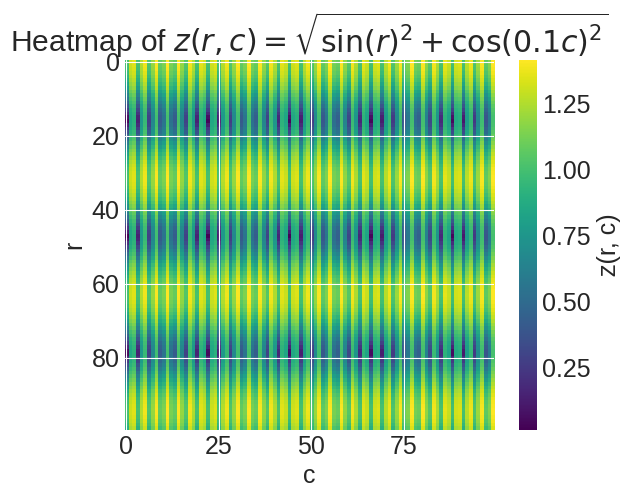

In [ ]:
# YOUR CODE HERE
rows = np.arange(100)
cols = np.arange(100)

r, c = np.meshgrid(rows, cols)
z = np.sqrt(np.sin(r)**2 + np.cos(0.1 * c)**2)

plt.imshow(z, cmap='viridis', origin='upper')  # 'origin=upper' to use matrix coordinates
plt.colorbar(label='z(r, c)')

plt.title(r'Heatmap of $z(r, c) = \sqrt{\sin(r)^2 + \cos(0.1c)^2}$')
plt.xlabel('c')
plt.ylabel('r')

plt.show()

## Extensions

Learn and explore another aspect of NumPy, matplotlib, scipy, and/or pandas that we did not talk about in class or practice in this project.

Before starting your extensions, please keep these guidelines in mind.

### General guidelines

1. Never integrate extensions into your base project so that they change the expected behavior of core functions. If your extension changes the core design/behavior, no problem, duplicate your working base project and add features from there.
2. Check the rubric to keep in mind how extensions on this project will be graded.
3. While I may consult your code and "written log" of what you did, **I am grading your extensions based on what you present in your 3-5 min video.**
3. I suggest documenting your explorations in a "log" or "lab notebook" style (i.e. documenting your thought/progression/discovery/learning process). I'm not grading your writing, so you can keep it succinct. **Whatever is most useful to you to remember what you did.**
4. I suggest taking a hypothesis driven approach. For example "I was curious about X so I explored Y. I found Z, which was not what I expected because..., so then tried A..."
5. Make plots to help showcase your results.
6. **More is not necessarily better.** Generally, a small number of "in-depth" extensions count for more than many "shallow" extensions.

### AI guidelines

You may use AI in mostly any capacity for extensions. However, keep in mind:
1. There is no need to use AI at all!
2. You are welcome to use AI as a tool (e.g. automate something that is tedious, help you get unstuck, etc.). However, you should be coding, you should be thinking, you should be writing, you should be creating. If you are spending most (or even close to most) of your time typing into a chatbot and copy-pasting, you have probably gone too far with AI use.
3. I don't find large volumes of AI generated code/text/plots to be particularly impressive and you risk losing my interest while grading. Remember: I'm grading your extensions based on your video presentation. **More is not necessarily better.**

### Video guidelines

1. Please try to keep your video to 5 minutes (*I have other projects to grade!*). If you turn in a longer video, I make no promise that I will watch more than 5 minutes.
2. Your screen should be shared as you show me what you did. A live video of your face should also appear somewhere on the screen (e.g. picture-in-picture overlay / split screen).
3. Your partner should join you for the video and take turns talking, but, if necessary, it is fine to have one team member present during the record the video.
4. Do not simply read text from your notebook, do not read from a prepared script. I am not grading how polished your video presentation is (see extension grading criteria on rubric).
5. I am looking for original and creative explorations sparked by your curiosity/interest/passion in a topic. This should be apparent in your video.
6. Be natural,, don't feel the need to impress me with fancy language. If it is helpful, imagine that we are talking one-on-one about your extension. Tell me what you did :)

In [90]:
# Sorting elements in Pandas using different sorting methods

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=['F1', 'F2', 'F3', 'F4', 'species'])

import time

# quicksort
start = time.time()
iris_quicksort = iris.sort_values(by='F1', kind = "quicksort", ascending=True)
end = time.time()
print(f'Quicksort took: {end-start} sec.')

# mergesort
start = time.time()
iris_mergesort = iris.sort_values(by='F1', kind = "mergesort", ascending=True)
end = time.time()
print(f'Mergesort took: {end-start} sec.')

# heapsort
start = time.time()
iris_heapsort = iris.sort_values(by='F1', kind = "heapsort", ascending=True)
end = time.time()
print(f'Heapsort took: {end-start} sec.')

# stable
start = time.time()
iris_stable = iris.sort_values(by='F1', kind = "stable", ascending=True)
end = time.time()
print(f'Stable took: {end-start} sec.')

# Stable < Mergesort < Heapsort < Quicksort

Quicksort took: 0.010400533676147461 sec.
Mergesort took: 0.0022749900817871094 sec.
Heapsort took: 0.002431154251098633 sec.
Stable took: 0.0014901161193847656 sec.


In [93]:
iris_mergesort

,F1,F2,F3,F4,species
13,4.3,3.0,1.1,0.1,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica


In [92]:
iris_quicksort

,F1,F2,F3,F4,species
13,4.3,3.0,1.1,0.1,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica


In [91]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=['F1', 'F2', 'F3', 'F4', 'species'])

iris_sorted = iris.sort_values(by=['F1','F2'], kind = "quicksort", ascending=[True, True])

iris_sorted

,F1,F2,F3,F4,species
13,4.3,3.0,1.1,0.1,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica


In [ ]:
# Making interactive visualizations in Matplotlib
!pip3 install ipywidgets
!pip3 install ipympl


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 9.6 MB/s eta 0:00:00


In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension install --py --symlink --sys-prefix ipympl

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Installing /usr/local/lib/python3.10/dist-packages/ipympl/nbextension -> jupyter-matplotlib
Symlinking: /usr/share/jupyter/nbextensions/jupyter-matplotlib -> /usr/local/lib/python3.10/dist-packages/ipympl/nbextension
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable ipympl --py --sys-prefix
    


In [ ]:
%matplotlib widget

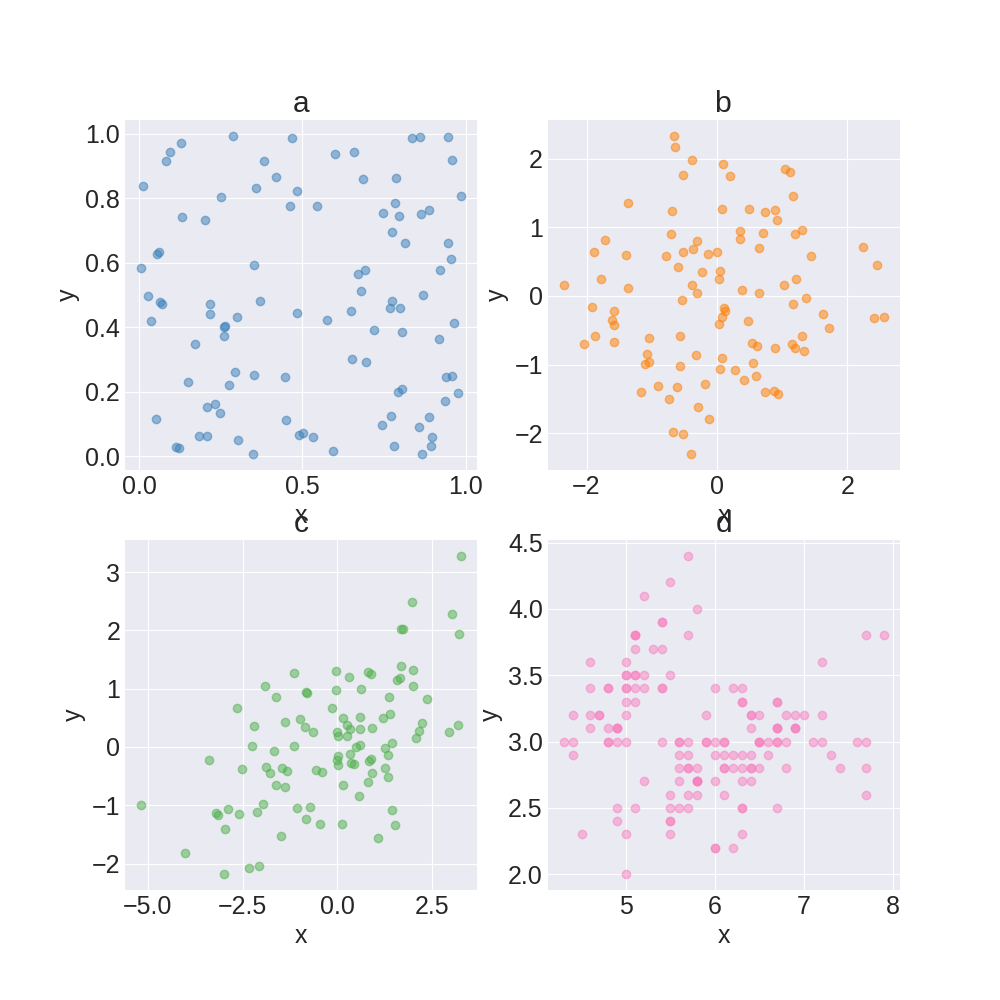

In [ ]:
# YOUR CODE HERE
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Axis (0,0): 2D Uniform random data
x_uniform = np.random.uniform(0, 1, 100)
y_uniform = np.random.uniform(0, 1, 100)
axs[0, 0].scatter(x_uniform, y_uniform, color='#377eb8', alpha=0.5)
axs[0, 0].set_title('a')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')

# Axis (0,1): 2D isotropic Gaussian random data (symmetric blob)
x_gaussian_iso = np.random.normal(0, 1, 100)
y_gaussian_iso = np.random.normal(0, 1, 100)
axs[0, 1].scatter(x_gaussian_iso, y_gaussian_iso, color='#ff7f00', alpha=0.5)
axs[0, 1].set_title('b')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')

# Axis (1,0): 2D anisotropic Gaussian random data (stretched blob)
mean = [0, 0]
cov = [[3, 1], [1, 1]]  # Anisotropic covariance matrix (stretched out)
x_aniso, y_aniso = np.random.multivariate_normal(mean, cov, 100).T
axs[1, 0].scatter(x_aniso, y_aniso, color='#4daf4a', alpha=0.5)
axs[1, 0].set_title('c')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')

# Axis (1,1): Iris dataset scatter plot
scatter = axs[1, 1].scatter(df['F1'], df['F2'], color='#f781bf', alpha=0.5)
axs[1, 1].set_title('d')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')

# Show the plot
plt.show()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()